# Is Modern Formula 1 Becoming Grid-Locked? A 2025 Pre-Reset Analysis

This project investigates how strongly starting position influenced race outcomes during the 2025 Formula 1 season. With major regulation changes arriving in 2026, 2025 provides a critical benchmark for evaluating whether modern F1 has become increasingly grid-constrained. By quantifying the relationship between grid position and finishing position, we assess the degree to which qualifying performance limits race mobility. The findings aim to provide a data-driven perspective on competitive dynamics before the upcoming regulation reset.

In [2]:
# Import all neccesary packages
import fastf1
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

This analysis uses official data from the 2025 Formula 1 season, retrieved via the FastF1 API. Only full race sessions were included, as the objective is to measure how starting position influences final classified results under standard race conditions.
For each race, the following variables were extracted: driver identifier, team, circuit name, grid position, final classified position, and finishing status. These fields allow us to quantify positional movement while controlling for non-finishes.

Sprint sessions were excluded to maintain consistency in race distance and strategy dynamics across events.

## 1. Introduction
Qualifying performance has increasingly been viewed as decisive in modern Formula 1. 
With limited overtaking opportunities and highly optimized car development under stable regulations, starting position may heavily constrain race outcomes.

The 2025 season represents the final year before major 2026 regulation changes, making it a critical benchmark for evaluating competitive dynamics. 

This study quantifies the relationship between grid position and finishing position across all 2025 race events to assess whether the season was structurally grid-constrained.


## 2. Loading 2025 Race Sessions

Race-level results from the 2025 Formula 1 season were retrieved using the FastF1 Python library. 
Only full Race sessions were included to maintain consistency in race length and competitive conditions. Sprint events were excluded.

For each race, the following fields were extracted:
- Driver identifier
- Team name
- Grid position
- Classified finishing position
- Race status
- Event name and round number

In [3]:
schedule_2025 = fastf1.get_event_schedule(2025)
#schedule_2025.info()
schedule_2025.head()

req         WARNING 	DEFAULT CACHE ENABLED! (2.15 GB) /Users/pranavghatigar/Library/Caches/fastf1


,RoundNumber,Country,Location,OfficialEventName,EventDate,EventName,EventFormat,Session1,Session1Date,Session1DateUtc,Session2,Session2Date,Session2DateUtc,Session3,Session3Date,Session3DateUtc,Session4,Session4Date,Session4DateUtc,Session5,Session5Date,Session5DateUtc,F1ApiSupport
0,0,Bahrain,Sakhir,FORMULA 1 ARAMCO PRE-SEASON TESTING 2025,2025-02-28,Pre-Season Testing,testing,Practice 1,2025-02-26 10:00:00+03:00,2025-02-26 07:00:00,Practice 2,2025-02-27 10:00:00+03:00,2025-02-27 07:00:00,Practice 3,2025-02-28 10:00:00+03:00,2025-02-28 07:00:00,None,NaT,NaT,None,NaT,NaT,True
1,1,Australia,Melbourne,FORMULA 1 LOUIS VUITTON AUSTRALIAN GRAND PRIX ...,2025-03-16,Australian Grand Prix,conventional,Practice 1,2025-03-14 12:30:00+11:00,2025-03-14 01:30:00,Practice 2,2025-03-14 16:00:00+11:00,2025-03-14 05:00:00,Practice 3,2025-03-15 12:30:00+11:00,2025-03-15 01:30:00,Qualifying,2025-03-15 16:00:00+11:00,2025-03-15 05:00:00,Race,2025-03-16 15:00:00+11:00,2025-03-16 04:00:00,True
2,2,China,Shanghai,FORMULA 1 HEINEKEN CHINESE GRAND PRIX 2025,2025-03-23,Chinese Grand Prix,sprint_qualifying,Practice 1,2025-03-21 11:30:00+08:00,2025-03-21 03:30:00,Sprint Qualifying,2025-03-21 15:30:00+08:00,2025-03-21 07:30:00,Sprint,2025-03-22 11:00:00+08:00,2025-03-22 03:00:00,Qualifying,2025-03-22 15:00:00+08:00,2025-03-22 07:00:00,Race,2025-03-23 15:00:00+08:00,2025-03-23 07:00:00,True
3,3,Japan,Suzuka,FORMULA 1 LENOVO JAPANESE GRAND PRIX 2025,2025-04-06,Japanese Grand Prix,conventional,Practice 1,2025-04-04 11:30:00+09:00,2025-04-04 02:30:00,Practice 2,2025-04-04 15:00:00+09:00,2025-04-04 06:00:00,Practice 3,2025-04-05 11:30:00+09:00,2025-04-05 02:30:00,Qualifying,2025-04-05 15:00:00+09:00,2025-04-05 06:00:00,Race,2025-04-06 14:00:00+09:00,2025-04-06 05:00:00,True
4,4,Bahrain,Sakhir,FORMULA 1 GULF AIR BAHRAIN GRAND PRIX 2025,2025-04-13,Bahrain Grand Prix,conventional,Practice 1,2025-04-11 14:30:00+03:00,2025-04-11 11:30:00,Practice 2,2025-04-11 18:00:00+03:00,2025-04-11 15:00:00,Practice 3,2025-04-12 15:30:00+03:00,2025-04-12 12:30:00,Qualifying,2025-04-12 19:00:00+03:00,2025-04-12 16:00:00,Race,2025-04-13 18:00:00+03:00,2025-04-13 15:00:00,True


In [4]:
conventional_races_2025 = schedule_2025[schedule_2025['EventFormat'] == 'conventional']
#conventional_races_2025.info()
conventional_races_2025.head()

,RoundNumber,Country,Location,OfficialEventName,EventDate,EventName,EventFormat,Session1,Session1Date,Session1DateUtc,Session2,Session2Date,Session2DateUtc,Session3,Session3Date,Session3DateUtc,Session4,Session4Date,Session4DateUtc,Session5,Session5Date,Session5DateUtc,F1ApiSupport
1,1,Australia,Melbourne,FORMULA 1 LOUIS VUITTON AUSTRALIAN GRAND PRIX ...,2025-03-16,Australian Grand Prix,conventional,Practice 1,2025-03-14 12:30:00+11:00,2025-03-14 01:30:00,Practice 2,2025-03-14 16:00:00+11:00,2025-03-14 05:00:00,Practice 3,2025-03-15 12:30:00+11:00,2025-03-15 01:30:00,Qualifying,2025-03-15 16:00:00+11:00,2025-03-15 05:00:00,Race,2025-03-16 15:00:00+11:00,2025-03-16 04:00:00,True
3,3,Japan,Suzuka,FORMULA 1 LENOVO JAPANESE GRAND PRIX 2025,2025-04-06,Japanese Grand Prix,conventional,Practice 1,2025-04-04 11:30:00+09:00,2025-04-04 02:30:00,Practice 2,2025-04-04 15:00:00+09:00,2025-04-04 06:00:00,Practice 3,2025-04-05 11:30:00+09:00,2025-04-05 02:30:00,Qualifying,2025-04-05 15:00:00+09:00,2025-04-05 06:00:00,Race,2025-04-06 14:00:00+09:00,2025-04-06 05:00:00,True
4,4,Bahrain,Sakhir,FORMULA 1 GULF AIR BAHRAIN GRAND PRIX 2025,2025-04-13,Bahrain Grand Prix,conventional,Practice 1,2025-04-11 14:30:00+03:00,2025-04-11 11:30:00,Practice 2,2025-04-11 18:00:00+03:00,2025-04-11 15:00:00,Practice 3,2025-04-12 15:30:00+03:00,2025-04-12 12:30:00,Qualifying,2025-04-12 19:00:00+03:00,2025-04-12 16:00:00,Race,2025-04-13 18:00:00+03:00,2025-04-13 15:00:00,True
5,5,Saudi Arabia,Jeddah,FORMULA 1 STC SAUDI ARABIAN GRAND PRIX 2025,2025-04-20,Saudi Arabian Grand Prix,conventional,Practice 1,2025-04-18 16:30:00+03:00,2025-04-18 13:30:00,Practice 2,2025-04-18 20:00:00+03:00,2025-04-18 17:00:00,Practice 3,2025-04-19 16:30:00+03:00,2025-04-19 13:30:00,Qualifying,2025-04-19 20:00:00+03:00,2025-04-19 17:00:00,Race,2025-04-20 20:00:00+03:00,2025-04-20 17:00:00,True
7,7,Italy,Imola,FORMULA 1 AWS GRAN PREMIO DEL MADE IN ITALY E ...,2025-05-18,Emilia Romagna Grand Prix,conventional,Practice 1,2025-05-16 13:30:00+02:00,2025-05-16 11:30:00,Practice 2,2025-05-16 17:00:00+02:00,2025-05-16 15:00:00,Practice 3,2025-05-17 12:30:00+02:00,2025-05-17 10:30:00,Qualifying,2025-05-17 16:00:00+02:00,2025-05-17 14:00:00,Race,2025-05-18 15:00:00+02:00,2025-05-18 13:00:00,True


In [5]:
all_race_results = []
for _, row in conventional_races_2025.iterrows():
    event_name = row['EventName']
    round_number = row['RoundNumber']
    print(f"Loading {event_name}...")
    
    session = fastf1.get_session(2025, event_name, 'Race')
    session.load()
    results = session.results.copy()
    results = results[['Abbreviation', 'TeamName', 'GridPosition', 'ClassifiedPosition', 'Status']]
    results['EventName'] = event_name
    results['RoundNumber'] = round_number
    results['Year'] = 2025
    
    all_race_results.append(results)
    
    

core           INFO 	Loading data for Australian Grand Prix - Race [v3.7.0]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info


Loading Australian Grand Prix...


req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
core        WARNING 	Fixed incorrect tyre stint information for driver '87'
core        WARNING 	Fixed incorrect tyre stint information for driver '30'
core        WARNING 	Fixed incorrect tyre stint information for driver '5'
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core        WARNING 	Driver 4 completed the race distance 00:00.022000 before the recorded end of the session.
core           INFO 	Finished loading data for 20 drivers: ['4', '1', '63', '12', '2

Loading Japanese Grand Prix...


req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '4', '81', '16', '63', '12', '44', '6', '23', '87', '14', '22', '10', '55', '7', '27', '30', '31', '5', '18']
core           INFO 	Loading data for Bahrain Grand Prix - Race [v3.7.0]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info


Loading Bahrain Grand Prix...


req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['81', '63', '4', '16', '44', '1', '10', '31', '22', '87', '12', '23', '6', '7', '14', '30', '18', '5', '55', '27']
core           INFO 	Loading data for Saudi Arabian Grand Prix - Race [v3.7.0]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info


Loading Saudi Arabian Grand Prix...


req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['81', '1', '16', '4', '63', '12', '44', '55', '23', '6', '14', '30', '87', '31', '27', '18', '7', '5', '22', '10']
core           INFO 	Loading data for Emilia Romagna Grand Prix - Race [v3.7.0]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info


Loading Emilia Romagna Grand Prix...


req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '4', '81', '44', '23', '16', '63', '55', '6', '22', '14', '27', '10', '30', '18', '43', '87', '5', '12', '31']
core           INFO 	Loading data for Monaco Grand Prix - Race [v3.7.0]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info


Loading Monaco Grand Prix...


req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['4', '16', '81', '1', '44', '6', '31', '30', '23', '55', '63', '87', '43', '5', '18', '27', '22', '12', '14', '10']
core           INFO 	Loading data for Spanish Grand Prix - Race [v3.7.0]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info


Loading Spanish Grand Prix...


req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 19 drivers: ['81', '4', '16', '63', '27', '44', '6', '10', '14', '1', '30', '5', '22', '55', '43', '31', '87', '12', '23']
core           INFO 	Loading data for Canadian Grand Prix - Race [v3.7.0]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info


Loading Canadian Grand Prix...


req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['63', '1', '12', '81', '16', '44', '14', '27', '31', '55', '87', '22', '43', '5', '10', '6', '18', '4', '30', '23']
core           INFO 	Loading data for Austrian Grand Prix - Race [v3.7.0]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info


Loading Austrian Grand Prix...


req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['4', '81', '16', '44', '63', '30', '14', '5', '27', '31', '87', '6', '10', '18', '43', '22', '23', '1', '12', '55']
core           INFO 	Loading data for British Grand Prix - Race [v3.7.0]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info


Loading British Grand Prix...


req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['4', '81', '27', '44', '1', '10', '18', '23', '14', '63', '87', '55', '31', '16', '22', '12', '6', '5', '30', '43']
core           INFO 	Loading data for Hungarian Grand Prix - Race [v3.7.0]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info


Loading Hungarian Grand Prix...


req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['4', '81', '63', '16', '14', '5', '18', '30', '1', '12', '6', '44', '27', '55', '23', '31', '22', '43', '10', '87']
core           INFO 	Loading data for Dutch Grand Prix - Race [v3.7.0]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info


Loading Dutch Grand Prix...


req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['81', '1', '6', '63', '23', '87', '18', '14', '22', '31', '43', '30', '55', '27', '5', '12', '10', '4', '16', '44']
core           INFO 	Loading data for Italian Grand Prix - Race [v3.7.0]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info


Loading Italian Grand Prix...


req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '4', '81', '16', '63', '44', '23', '5', '12', '6', '55', '87', '22', '30', '31', '10', '43', '18', '14', '27']
core           INFO 	Loading data for Azerbaijan Grand Prix - Race [v3.7.0]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info


Loading Azerbaijan Grand Prix...


req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core        WARNING 	Driver 1 completed the race distance 00:00.015000 before the recorded end of the session.
core           INFO 	Finished loading data for 20 drivers: ['1', '63', '55', '12', '30', '22', '4', '44', '16', '6', '5', '87', '23', '31', '14', '27', '18', '10', '43', '81']
core           INFO 	Loading data for Singapore Grand Prix - Race [v3.7.0]
req            INFO 	Using cached data for session_info
req 

Loading Singapore Grand Prix...


req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['63', '1', '4', '81', '12', '16', '14', '44', '87', '55', '6', '22', '18', '23', '30', '43', '5', '31', '10', '27']
core           INFO 	Loading data for Mexico City Grand Prix - Race [v3.7.0]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info


Loading Mexico City Grand Prix...


req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['4', '16', '1', '87', '81', '12', '63', '44', '31', '5', '22', '23', '6', '18', '10', '43', '55', '14', '27', '30']
core           INFO 	Loading data for Las Vegas Grand Prix - Race [v3.7.0]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info


Loading Las Vegas Grand Prix...


req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
core        WARNING 	Fixed incorrect tyre stint information for driver '63'
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '63', '12', '16', '55', '6', '27', '44', '31', '87', '14', '22', '10', '30', '43', '23', '5', '18', '4', '81']
core           INFO 	Loading data for Abu Dhabi Grand Prix - Race [v3.7.0]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data 

Loading Abu Dhabi Grand Prix...


req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '81', '4', '16', '63', '14', '31', '44', '27', '18', '5', '87', '55', '22', '12', '23', '6', '30', '10', '43']


In [6]:
master_df = pd.concat(all_race_results, ignore_index=True)
#master_df.info()
master_df.head()


,Abbreviation,TeamName,GridPosition,ClassifiedPosition,Status,EventName,RoundNumber,Year
0,NOR,McLaren,1.0,1,Finished,Australian Grand Prix,1,2025
1,VER,Red Bull Racing,3.0,2,Finished,Australian Grand Prix,1,2025
2,RUS,Mercedes,4.0,3,Finished,Australian Grand Prix,1,2025
3,ANT,Mercedes,16.0,4,Finished,Australian Grand Prix,1,2025
4,ALB,Williams,6.0,5,Finished,Australian Grand Prix,1,2025


## 3. Data Cleaning

To isolate competitive mobility, non-finishers were removed from the analysis. 
Drivers classified as 'Retired', 'Disqualified', or 'Did not start' were excluded, 
while only drivers with final classified results ('Finished' or 'Lapped') were retained.

Finishing positions were converted to numeric format to enable statistical computation.

To ensure consistency across variables, both `GridPosition` and `ClassifiedPosition` 
were cast to integer type.



In [7]:
master_df['Status'].unique()

array(['Finished', 'Retired', 'Lapped', 'Disqualified', 'Did not start'],
      dtype=object)

In [8]:
new_master_df = master_df[
    master_df['Status'].isin(['Finished', 'Lapped'])].copy()
new_master_df.info()

<class 'fastf1.core.SessionResults'>
Index: 315 entries, 0 to 358
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Abbreviation        315 non-null    object 
 1   TeamName            315 non-null    object 
 2   GridPosition        315 non-null    float64
 3   ClassifiedPosition  315 non-null    object 
 4   Status              315 non-null    object 
 5   EventName           315 non-null    object 
 6   RoundNumber         315 non-null    int64  
 7   Year                315 non-null    int64  
dtypes: float64(1), int64(2), object(5)
memory usage: 22.1+ KB


In [9]:
new_master_df['ClassifiedPosition'] = pd.to_numeric(
    new_master_df['ClassifiedPosition'], errors='coerce')
new_master_df['ClassifiedPosition'].isna().sum()

np.int64(0)

In [10]:
new_master_df['GridPosition'] = new_master_df['GridPosition'].astype(int)
new_master_df['ClassifiedPosition'] = new_master_df['ClassifiedPosition'].astype(int)
new_master_df.dtypes


Abbreviation          object
TeamName              object
GridPosition           int64
ClassifiedPosition     int64
Status                object
EventName             object
RoundNumber            int64
Year                   int64
dtype: object

## 4. Feature Engineering

Two primary mobility metrics were constructed:

**PositionsChanged**
= GridPosition − ClassifiedPosition  
Positive values indicate positions gained; negative values indicate positions lost.

**AbsoluteMovement**
= |PositionChange|  
Measures the magnitude of positional change regardless of direction.

Additionally, a circuit-level metric was defined:

**Grid Constraint Index**
= Correlation between GridPosition and ClassifiedPosition within a race.

Higher values indicate stronger dependence of finishing position on qualifying position.


In [11]:
new_master_df['PositionsChanged'] = new_master_df['GridPosition'] - new_master_df['ClassifiedPosition']
new_master_df.head(15)

,Abbreviation,TeamName,GridPosition,ClassifiedPosition,Status,EventName,RoundNumber,Year,PositionsChanged
0,NOR,McLaren,1,1,Finished,Australian Grand Prix,1,2025,0
1,VER,Red Bull Racing,3,2,Finished,Australian Grand Prix,1,2025,1
2,RUS,Mercedes,4,3,Finished,Australian Grand Prix,1,2025,1
3,ANT,Mercedes,16,4,Finished,Australian Grand Prix,1,2025,12
4,ALB,Williams,6,5,Finished,Australian Grand Prix,1,2025,1
5,STR,Aston Martin,13,6,Finished,Australian Grand Prix,1,2025,7
6,HUL,Kick Sauber,17,7,Finished,Australian Grand Prix,1,2025,10
7,LEC,Ferrari,7,8,Finished,Australian Grand Prix,1,2025,-1
8,PIA,McLaren,2,9,Finished,Australian Grand Prix,1,2025,-7
9,HAM,Ferrari,8,10,Finished,Australian Grand Prix,1,2025,-2


In [12]:
avg_positions_changed = new_master_df['PositionsChanged'].mean()
print(avg_positions_changed)

0.9873015873015873


## 5. Season-Level Analysis

The overall correlation between grid position and finishing position across the 2025 season was computed.

This value serves as a season-wide measure of qualifying dependence.

Interpretation:
- Values close to 1 indicate strong grid constraint.
- Values closer to 0 indicate higher race mobility.

The season-wide result provides a baseline before examining track-level variation.


In [13]:
print(new_master_df['GridPosition'].corr(new_master_df['ClassifiedPosition']))


0.7617308324381543


## 6. Circuit-Level Analysis

To understand track-specific dynamics, the Grid Constraint Index was computed separately for each race.

This allows identification of:
- Highly grid-locked circuits
- Moderately constrained circuits
- Highly mobile circuits

Variation across circuits reveals whether season-wide averages mask structural differences in overtaking potential.

In [22]:
race_corr = (
    new_master_df
    .groupby(['Year', 'RoundNumber', 'EventName'])
    .apply(lambda g: g['GridPosition'].corr(g['ClassifiedPosition']))
    .reset_index(name='GridConstraintIndex')
)

race_corr.sort_values('GridConstraintIndex', ascending=False).head(5)


/var/folders/kh/tj_51x8173n64xb3dh8c7l340000gn/T/ipykernel_1874/1639469350.py:4: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda g: g['GridPosition'].corr(g['ClassifiedPosition']))


,Year,RoundNumber,EventName,GridConstraintIndex
1,2025,3,Japanese Grand Prix,0.963910
3,2025,5,Saudi Arabian Grand Prix,0.934175
10,2025,14,Hungarian Grand Prix,0.908133
13,2025,17,Azerbaijan Grand Prix,0.881913
7,2025,10,Canadian Grand Prix,0.865231


In [23]:
race_corr.sort_values('GridConstraintIndex', ascending=True).head(5)


,Year,RoundNumber,EventName,GridConstraintIndex
9,2025,12,British Grand Prix,0.279710
16,2025,22,Las Vegas Grand Prix,0.386318
11,2025,15,Dutch Grand Prix,0.458385
0,2025,1,Australian Grand Prix,0.493447
4,2025,7,Emilia Romagna Grand Prix,0.672194


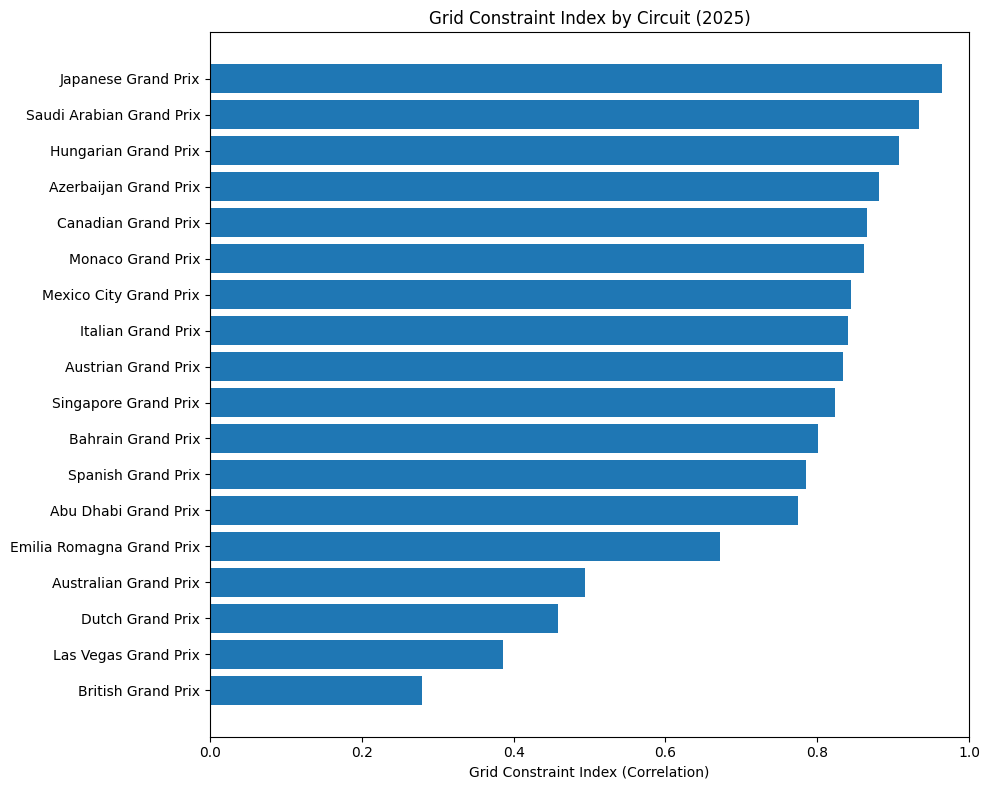

In [16]:

plt.figure(figsize=(10, 8))

sorted_corr = race_corr.sort_values('GridConstraintIndex')

plt.barh(
    sorted_corr['EventName'],
    sorted_corr['GridConstraintIndex']
)

plt.xlabel('Grid Constraint Index (Correlation)')
plt.title('Grid Constraint Index by Circuit (2025)')

plt.xlim(0, 1)
plt.tight_layout()
plt.show()


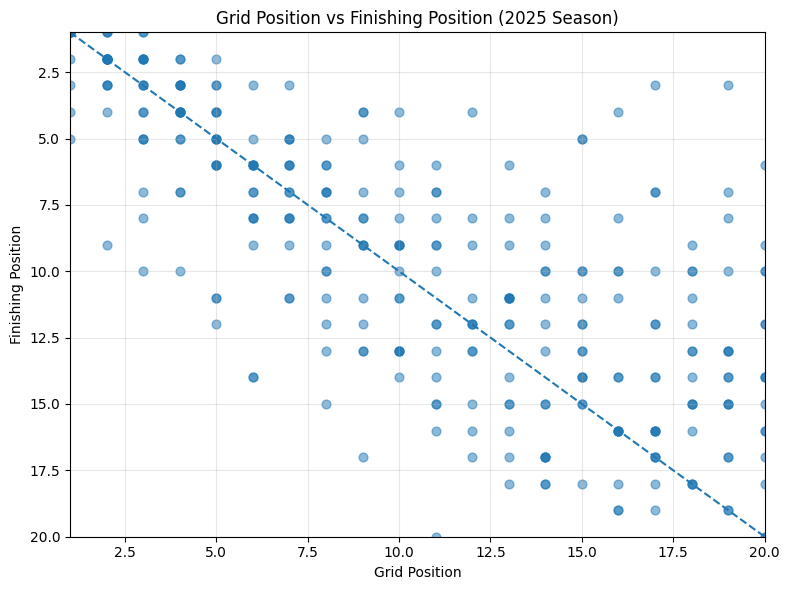

In [17]:
plt.figure(figsize=(8, 6))

plt.scatter(
    new_master_df['GridPosition'],
    new_master_df['ClassifiedPosition'],
    alpha=0.5,
    s=40
)
max_pos = 20
plt.plot([1, max_pos], [1, max_pos], linestyle='--')

plt.xlabel('Grid Position')
plt.ylabel('Finishing Position')
plt.title('Grid Position vs Finishing Position (2025 Season)')

plt.xlim(1, 20)
plt.ylim(20, 1)  

plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


The clustering of points along the diagonal indicates a strong relationship between grid and finishing position. Drivers generally finish near where they start, reflecting significant qualifying dependence. However, visible dispersion—particularly in the midfield—shows that meaningful race mobility still occurs.

In [24]:
new_master_df['AbsoluteMovement'] = new_master_df['PositionsChanged'].abs()
abs_movement = (new_master_df
                .groupby(['Year', 'RoundNumber', 'EventName'])['AbsoluteMovement']
                .mean()
                .reset_index(name='AvgAbsoluteMovement')
                .sort_values('AvgAbsoluteMovement', ascending=False)
)

abs_movement.head(5)

,Year,RoundNumber,EventName,AvgAbsoluteMovement
16,2025,22,Las Vegas Grand Prix,4.800000
9,2025,12,British Grand Prix,4.733333
11,2025,15,Dutch Grand Prix,4.588235
0,2025,1,Australian Grand Prix,4.500000
4,2025,7,Emilia Romagna Grand Prix,3.555556


In [19]:
print(race_corr['GridConstraintIndex'].describe())

count    18.000000
mean      0.744947
std       0.201728
min       0.279710
25%       0.697754
50%       0.828944
75%       0.864357
max       0.963910
Name: GridConstraintIndex, dtype: float64


## 7. Outlier Investigation: British Grand Prix

The British Grand Prix exhibited an exceptionally low Grid Constraint Index relative to the season average.

This race recorded:
- High average positional movement
- Multiple retirements and race disruptions

This suggests that chaotic race conditions significantly weaken the relationship between starting and finishing position.


In [20]:
master_df[
    (master_df['EventName'] == 'British Grand Prix') &
    (~master_df['Status'].isin(['Finished', 'Lapped']))
]['Status'].value_counts()


Status
Retired          4
Did not start    1
Name: count, dtype: int64

## 8. Conclusion

The 2025 Formula 1 season demonstrates strong qualifying dependence across most circuits, with a high overall correlation between grid and finishing position.

However, race-specific disruptions can significantly reduce grid predictability, introducing volatility into the competitive order.

Overall, the season can be characterized as structurally grid-constrained under stable regulations, providing a benchmark ahead of the 2026 regulatory reset.
